First we want to import all the libraries we will need

In [3]:
import pandas as pd, numpy as np
from pandas import DataFrame, Series 
import pandas.io.data as web #need this to import starbucks data, as in course example
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

The course provides a csv of Starbucks (ticker SBUX) Adjusted Close Price from 1993-2008.

In [4]:
# data URL provided by course

data_url = 'http://assets.datacamp.com/course/compfin/sbuxPrices.csv' 

# read the csv file provided, use the first column (the dates) as the index, and parse the dates
sbux_df = pd.read_csv(data_url,index_col=0,parse_dates=True)

In [5]:
#display the top and bottom of the data
sbux_df.head() 
sbux_df.tail()

,Adj Close
Date,
2007-11-01,22.24
2007-12-03,19.46
2008-01-02,17.98
2008-02-01,17.10
2008-03-03,16.64


In [6]:
closing_prices = sbux_df['Adj Close']
closing_prices

Date
1993-03-31    1.13
1993-04-01    1.15
1993-05-03    1.43
1993-06-01    1.46
1993-07-01    1.41
1993-08-02    1.44
1993-09-01    1.63
1993-10-01    1.59
1993-11-01    1.32
1993-12-01    1.32
1994-01-03    1.43
1994-02-01    1.38
1994-03-01    1.45
1994-04-04    1.77
1994-05-02    1.69
...
2007-01-03    33.22
2007-02-01    29.38
2007-03-01    29.82
2007-04-02    29.50
2007-05-01    27.40
2007-06-01    24.95
2007-07-02    25.37
2007-08-01    26.20
2007-09-04    24.91
2007-10-01    25.37
2007-11-01    22.24
2007-12-03    19.46
2008-01-02    17.98
2008-02-01    17.10
2008-03-03    16.64
Name: Adj Close, Length: 181

In [7]:
#find prices between dates 3/1/1994 and 3/1/1995
some_prices = closing_prices['1994-03-01':'1995-03-01'] #this task is very simple in python using pandas

In [8]:
#similarly, find prices on exact dates

sbux_prices_df = sbux_df.copy()

price_1 = sbux_prices_df.ix["1994-03-01"]
price_2 = sbux_prices_df.ix['1995-03-01']

Let's plot it to see how the price evolves over time. Note the steady rise, and the onset of the US '07-'09 bear market.

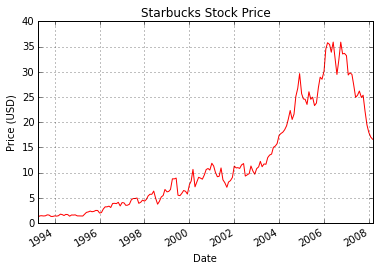

In [9]:
ax=sbux_df.plot(color='r',legend=False,title='Starbucks Stock Price')
ax.set_ylabel('Price (USD)')

Compute the returns using 
\begin{equation}
    R_t=\frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} -1
\end{equation}
as given in lecture. So we want to take price at time point t and subtract from the previous given price.

In [10]:
#use dataframe.shift() method to shift the timeseries by 1
sbux_ret = (sbux_df.ix[1:] / sbux_df.shift(1)) -1 

#Note: we could have also used dataframe.pct_change() method as well

Now let's compute continuously compounded returns using 
\begin{equation}
    r_t=\ln(1+R_t)=\ln(1+\frac{P_t - P_{t-1}}{P_{t-1}}) =  \ln(\frac{P_t}{P_{t-1}}) = \ln(P_t) - \ln(P_{t-1})
\end{equation}
again as given in the lecture.

In [11]:
#use the numpy logarithm on dataframes, could also use df.apply()
sbux_ccret = np.log(sbux_df.ix[1:])- np.log(sbux_df.shift(1))

In [12]:
#This is how you concatenate the time series in python using pandas
concatenated=pd.concat([sbux_ret[1:],sbux_ccret[1:]],axis=1)

Now let's plot both $R_t$ and $r_t$. 

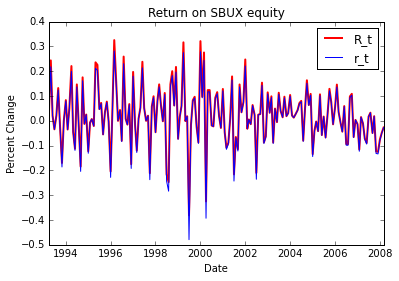

In [13]:
#ax=concatenated.plot(label=['1','2'], color=['b' ,'r'],title='Simple vs Continuously Compounded Return')

plotDomain=sbux_df.index[1:];

ret_plot=plt.plot(plotDomain,sbux_ret[1:],color='r',linewidth =2.0,label='R_t')
ccret_plot=plt.plot(plotDomain,sbux_ccret[1:],color='b',linewidth=1,label='r_t')
plt.legend()
plt.ylabel('Percent Change')
plt.xlabel('Date')
plt.title('Return on SBUX equity')

Let's calculate the growth of $1, i.e. Gross return

\begin{equation}
    R_{Gross} = R_t+1
\end{equation}
as given in class. This is our return on an initial $1 investment.

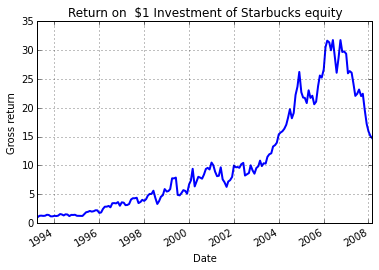

In [14]:
sbux_grossret = sbux_ret + 1 
sbux_grossret.cumprod().plot(legend=False,color='b',linewidth=2)
plt.ylabel('Gross return')
plt.title('Return on  $1 Investment of Starbucks equity')

We are given monthly data from Dec 2004 to Dec 2005 (13 months), and are asked to compute the simple return, $R_t$, from Dec 2004 to Jan2005. This is calculated by using
\begin{equation}
    R_t = \frac{P_t-P_{t-1}}{P_{t-1}} \tag{1}
\end{equation}

as given in one of the first slides of Week 1 lectures.

In [15]:
#First let's download the data ourselves
start = datetime.datetime(2004, 12, 31)
end = datetime.datetime(2005, 12, 31)

f=web.DataReader('SBUX', 'yahoo', start, end) 
sbux=f['Adj Close'].resample('M') #resample the data so we only have the price at the last calendar day of each month

In [16]:
#compute the simple return in the 1st month
simple_return = (sbux[1]-sbux[0])/sbux[0]

What is the continuously compounded monthly return between December 2004 and January 2005?
Recall continuously compounded return is given by

\begin{equation}
    r = \ln(1+R) \tag{2}
\end{equation}

In [17]:
cc_return = np.log(1+simple_return) # compute the continuously compounded rate for the 1st month

Assume that all twelve months have the same return as the simple monthly return between the end of December 2004 and the end of January 2005. What would be the annual return with monthly compounding in that case?

This one is a tad bit trickier but it's not so bad. Assume that we have the same monthly return for the entire year we held the stock. Take this simple monthly compounded rate, and apply it to our initial price 12 times (1 year). Then find the percent change compared to our initial investment.

In [18]:
principal=sbux[0]
future_value=principal*(1+simple_return)**1
annual_return=(future_value-principal)/principal

Now we want to compute the actual simple annual return. Here we just use Eq. (1) again but now $P_t$ is the price of the equity in Dec 2005, $P_{t-1}$ is the price in Dec 2004.

In [19]:
principal=sbux[0]
current_value=sbux[-2]
actual_annual=(current_value-principal)/principal

And finally, to convert this simple annual interest rate to continuously cmopounded rate, we use Eq. (2).

In [20]:
r_a=np.log(1+actual_annual)